In [1]:
import ensemble
import importlib
importlib.reload(ensemble)

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import RadiusNeighborsRegressor, KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 5]


from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

import pandas as pd
from sklearn.datasets import make_regression

# Introduction

## Specific Goals of the Work

**Why Models?**
Machine Learning (ML) is often used to facilitate decision making. Knowing what value a product is likely to have in certain market, for example, is going to influence pricing, marketing and future planning. These kinds of predictions are plentiful, and modern ML has come a long way from (only) being able to predict linear relationships between variables to superior models such as complex decision trees, that can model complicated combinations and interactions between features.

**Why Uncertainty?**
However, classically and due to certain restrictions such as tractability, ML has been focussed on predicting a point value rather than a range of values; while this is enough to make decisions in which do not depend in the actual value too much, it is a great restriction for situations in which we want to make a decision that is as well-informed as possible. 
In a situation like this, we would prefer not only a point estimate, but also an estimation of *how likely it is that the actual value is going to fall close to this point*. Imagine making the decision of selling a house: the seller would be more at ease with his sale knowing that the outcome will likely fall between 480.000 and 520.000 than if the prediction is just 'something between one and a million'. Essentially, what we try to capture with this spread of values (one particular implementation of this concept is the *standard deviation* of a normal distribution) is the *risk* we are taking by relying on the prediction. This obviously has other use cases, be it in medicine, game-playing or any other kind of situation that involves committing to one course of action over another. 

One of the more infuential branches of statistical thinking, so called Bayesianism, has promoted the need for having a full distribution over possible values, and with it predictive uncertainty, for years and years. However, while bayesian models exist (there are equivalents for linear regression for example) and things like Bayesian Networks and Gaussian Processes rival 'classical, or 'frequentist' approaches on a regular basis, they come with certain limitations, such as necessitating the specification of a prior as well as intractability for more complext models. 

**What are Ensembles?**
In recent years, two particular branches of machine learning have gathered wide spread attention: So-called 'Deep Learning', which in its roots intended to mimic the human brain by constructing vast networks of artificial neurons that propagate signals through different layers until a prediction is found (others have called them stacked logistic regressions, and there is a point to be made for this particular description, too). The other are ensembles, groups of models that are combined in order to make a better prediction than any one model would be able to alone (see the computation of why they are better in voing for example; see Concordets Jury theorem). [Footnote: There seem to be deep connection between ensembling and certain kinds of neural network mehtodologies, such as dropout, which is sometimes referred to as 'ensembling with extreme parameter sharing'. This will be interesting in the discussion].
While Deep Learning gathers all the (public) interest of research and media, ensembling has established itself as a collection of methods that are being used in practice as well as in ML competitions; as is evident by posts like this one: https://www.datasciencecentral.com/profiles/blogs/want-to-win-at-kaggle-pay-attention-to-your-ensembles.

**what is this work about**
After reviewing a sample from the literature on ensembling, uncertainty and the combination of both, the current project aims to investigate the possibility to extract uncertainty information from ensembles in regression in addition to a point estimate of the predictive value. In order to do so, a very simple addtion is being made: When computing the predictive mean by averaging the predictions of the ensemble members, we also compute the standard deviation of this sample of predictions in order to obtain an approximation of the dostribution over values that the ensemble would deem likely. This way of obtaining uncertainty does not suffer limitations which has long plagued approaches that utilise full distributions over parameters (see bayesian models), such as intractability. The uncertainty that is obtained that way is being tested with several indicator values on the 'quality of uncertainty' that is being delivered.
Additionally, in the discussion part, some more intricate consequences of this approach are being spproached, including a short primer on priors on ensembles as well as on what kinds of uncertainty we are reporting in our case and finally, an outlook on how this methodology might be used in combination with complex models such as deep learning, what the addition of uncertainty could bring to the table in applications and finally, how this work could be improved upon.



## Review of related work

The review part will be split up in three parts:

- literature that focusses on ensembles.
This is used as a general introduction to the topic and closely related to some of the course materials, topics include the definition of ensemble, ways of obtaining a combined prediction from ensembles and ways to introduce diversity in an ensemble.

- literature that focusses on uncertainty of quality measures for uncertainty.
This is used to give a brief overview including a defintion of (predictive) uncertainty, a distinction between model and data uncertainty and a description of some of the measures used to evaluate uncertainty.

- literature that combines both.
Finally, this part of the section will focus on a subset of work that has already been done on the field of obtaining predictive uncertainty from ensembles. Specifically, it will introduce the notion of bayesian ensemble averaging, introduce a case study on climate change and finally add in a link on how the concepts used in this work can be extended towards Neural Networks that utilise Dropout.


### work that focusses on Ensembles
Ensemble definition.
**What is an Ensemble**

An ensemble is a group of Machine Learning models whos predictions get combined in a certain way to improve their predicitve accuracy.

The ways of combining models are manifold, some examples can be found in Kuncheva, L. I. (2004). While the author mentions untrainable and trainable combiners, this work will focus on simple, untrainable combinersfor reasons of scope. 
For Classification, most combiners feature some kind of voting process. This is made possible by the very restricted realm of output values (usually restricted to the number of classes). As we have seen in the lecture, Concordet's Voting [THINGY] gives us statistical likeliness that an ensemble putperforms the single expert as soon as their chance of being correct is higher than 50%.
For regression, combiners are typically some kind of average; obviosuly it is non-trivial to imagine what voting in the realm of continuous numbers would look like. The more common combiners are taking the mean of the predictions; analogous concepts like median averaging of even mode do seem possible. However, for our purpose, we chose to go with a simple mean averaging, since both mean and standard deviation are used in the description of Normal Distributions. Since, for the sake of brevity, we assume our errors to be normally distributed and thus our predictive variance to be of the same form, being able to compute both statistics in one go is a big benefit of the method.


Explain Different ways of training ensembles.
**subspace, bootstrap (63%), mix of models, forest, shuffle data**
Less trivial than the combination of ensemble member prediction is making sure that the ensemble members are sufficiently different from each other. In a situation where the ensemble members are too similar, it is likely that our different predictions will be similar, making the whole excercise futile (imagine the most extreme case where we build an ensemble of  exactly the same model - we will end up with a number of predictions that are all the same. In this case we would be better off dropping all but one model and just using that one, saving resources, time and energy).

There are a couple of ways of making sure an ensemble is sufficiently diverse, Dietterich, T. G. (n.d.). mentions several.

- Bootstrap is a method in which diversity in models is encouraged by randomly subsampling the original Dataset with replacement. This leads to models being trained on slightly different training sets, which in turn enables them to focus on different parts of the evidence, or, to stay with our expert analogy, they become experts on slightly different subfields. **63%**

- Another way of introducing diversity in ensembles that is seeing use in publications such as Lakshminarayanan, B., Pritzel, A., & Blundell, C. (n.d.) is to introduce the Data set to different models in different shufflings. Many types of Machine Learnaing models are strongly influenced by the order that the evidence is presented. While this usually is an unwanted side effect, in ensembling it can sometimes be used to produce sufficiently different models.

- A rathoer obvious way of generating diversity within an ensemble is simply to utilise different types of models. A support vector machine has a different way of interpreting the evidence than a random forest, so it is only natural to harvest both of their qualities by combining their predictions in an ensemble. There are some drawbacks to this, mainly that for most situations, one model tends to outperform the others. Generally speaking, a combination of several models should be done with care and requires a lot of testing and tweaking to actually harvest significant gains. For this work, however, we are less concerned with the accuracy of the model than it's predictive uncertainty, and as we will see later, combining models gives rise to a nice and very interpretable kind of spread of values.

- One of the more interesting methods, and the last one used in this work, is the random subspace method, introduced in Ho, T. K. (1998). This method 
is similar to bootstrapping in that it generates random subsamples of the data; however, instead of dropping out data points, in this case we randomly ignore a whole dimension of the Evidence for each model. Obviously, this method is not suited for low-dimensional data and thus is ommitted for our toy datasets.


### work that focusses on Uncertainty or quality of uncertainty

Now that we have defined what an ensemble is and reviewed some of the accompanying literature, let's focus on the other important subject of this work: _Predictive Uncertainty_.


Predictive Uncertainty definition
**What is predictive Uncertainty**

Predictive Uncertainty in our case refers to the spread of values that a model predicts as likely. This can be a narrow spread ('this house is likely worth between 99.900 and 101.000 Euro') or a broad one ('this property is likely worth between 10 and 200.000 Euro'). It is noteworthy that in both cases our predictive mean might be around 100.000 Eur0. Thus, not being aware of the predictive uncertainty is a dangerous situation to be in - it seems that everyone would be inclined to ask a second opinion in the second case. The study of predictive uncertainty is, interestingly, mainly brought forward in meteorology. Renard, B., Kavetski, D., Kuczera, G., Thyer, M., & Franks, S. W. (2010) for example, while writing a deeply insightful paper for machine learning practicioners, originally focussed on hydrology. 


Uncertainty definition
**what is uncertainty, aleatoric (model) vs epistemic (data) uncertainy**
**Which one do we have? Could we theoretically test for one or the other?**
A distinction to be made when looking at predctive uncertainty is it's source: Uncertainty can either stem fromm a model that is not sure about what it should predict, in which case we should feed it more data or switch to another model; or it can stem from the data itself, when for example to very similar values in the predicting variables map to very different target values. The first kind of uncertainty is generally referred to as 'epistemic' uncertainty, and it is generally assumed to be the 'better' kind of uncertainty to have - simply because it can be remedied without surveying for more data. 'Aleatoric' uncertainty, on the other hand, is also referred to as 'unknowable' uncertainty. It's reasons range from broken sensors to the inference quantum effects in making accurate measutements impossible. Kiureghian, A. Der, & Ditlevsen, O. (2009) wrote an impressive work on how to find out which uncertainty you are facing, and how to remedy it if possible. In our work we do not distinguish between aleatoric and epistemic uncertainty, if just for the case that we are actively trying to induce predictive uncertainty by training different models.


How is uncertainty classically displayed?
**Normal Distribution of errors, **


Out of Sample Distributions
**What is it, how do we do it in Regression**

In order to test 
Out of Sample distributions are a generally accepted way of 

Callibration
**What is Calibration, how dot we compute it**

NLPD
**average negative log predictive density**
Quiñonero-Candela, J., Rasmussen, C. E., Sinz, F., Bousquet, O., & Schölkopf, B. (n.d.).

 In a gist, it's an average measure of how closely the predictive uncertainty matches the error, with a logarithmic penalty term for uncertainties






- Tashman, L. (2000). Out -of-sample tests of forecasting accuracy:ananalysisandreview. International Journal of Forecasting, 16, 437–450. Retrieved from https://www.researchgate.net/profile/Len_Tashman/publication/247087596_Out-of_sample_tests_of_forecasting_accuracy_a_tutorial_and_review/links/5745ceec08ae9f741b430de3.pdf

- Willink, R., & White, R. (n.d.). Disentangling Classical and Bayesian Approaches to Uncertainty Analysis. Retrieved from https://www.bipm.org/cc/CCT/Allowed/26/Disentangling_uncertainty_v14.pdf

### work that focusses on Ensembles and Uncertainty

What work has been done before?
**This idea isnt new it appears**

Difference between Bayes and Frequentist. 
**Why is Ensembling a Bayesian Method?**

Deep Learning shows some promising ideas
**Dropout Networks are Ensembles with extreme parameter sharing**

- Characterizing and Visualizing Predictive Uncertainty in Numerical Ensembles Through Bayesian Model Averaging. (n.d.). Retrieved from http://graphics.cs.ucdavis.edu/~joy/NSF-IIS-1018097/Papers/Vis13_175.pdf

- Adding Uncertainty to Deep Learning – Towards Data Science. (n.d.). Retrieved June 6, 2018, from https://towardsdatascience.com/adding-uncertainty-to-deep-learning-ecc2401f2013

- Parker, W. S. (2013). Ensemble modeling, uncertainty and robust predictions. Wiley Interdisciplinary Reviews: Climate Change, 4(3), 213–223. http://doi.org/10.1002/wcc.220






# Datasets

The Datasets used for the project consist of two toy datasets and one real life dataset that has been used in several publications.

## Linear Case
The linear case is made by invoking sklearn's make_regression(). It contains 200 samples with 1 feature and a noise level of 25.

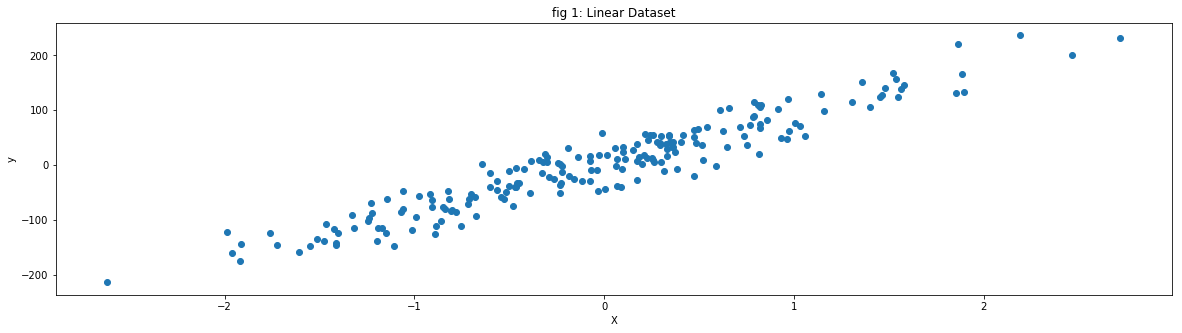

In [19]:
X, y = make_regression(n_samples=200, n_features=1, noise=25,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('fig 1: Linear Dataset')

#### nonlinear case

the nonlinear case is a simple sinoid function with some added error points every now and then

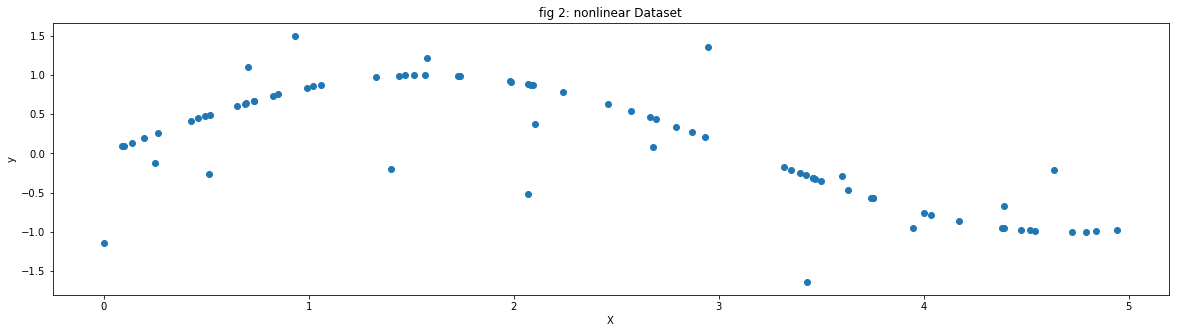

In [20]:
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('fig 2: nonlinear Dataset')

#### Boston Housing Dataset
The Boston housing dataset is a real life dataset that was used in several publications and contains a survey of housing prices in different parts of Boston. The dataset features 506 entries and contains 13+1 variables, ranging from number of rooms to general descriptors of the neighborhood (some of which seem slightly irritating in 2018, but that is not the point). It was chosen for it's relative ease of use combined with multi-dimensionality and being an interesting prediction case.

It can be found here: https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names, but since it is one of the classical datasets incorporated in scikit learn, we can simply load it from there. A more thorough explanation of the dataset can e.g. be found here: https://www.kaggle.com/vikrishnan/boston-house-prices.

As we can see in fig 3 and 4, its predictors range from almost linear in relation to the target to more complex relations.

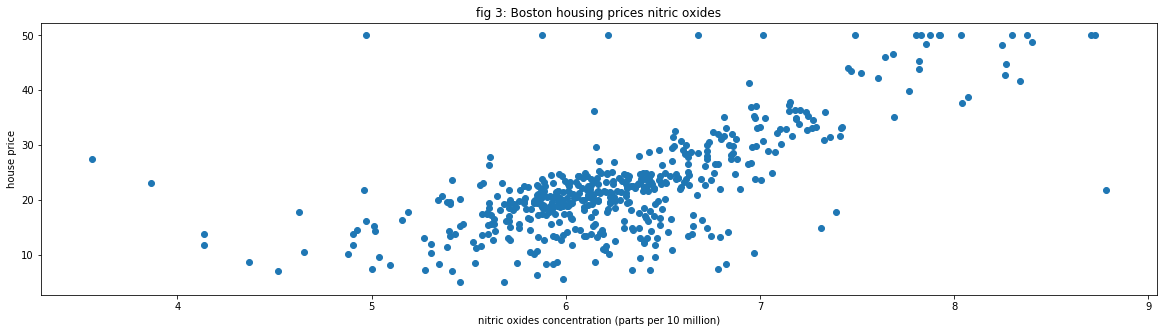

In [21]:
boston = load_boston()
y = boston.target
X = boston.data

plt.scatter(X[:,5],y)
plt.ylabel('house price')
plt.xlabel('nitric oxides concentration (parts per 10 million)')
plt.title('fig 3: Boston housing prices nitric oxides')

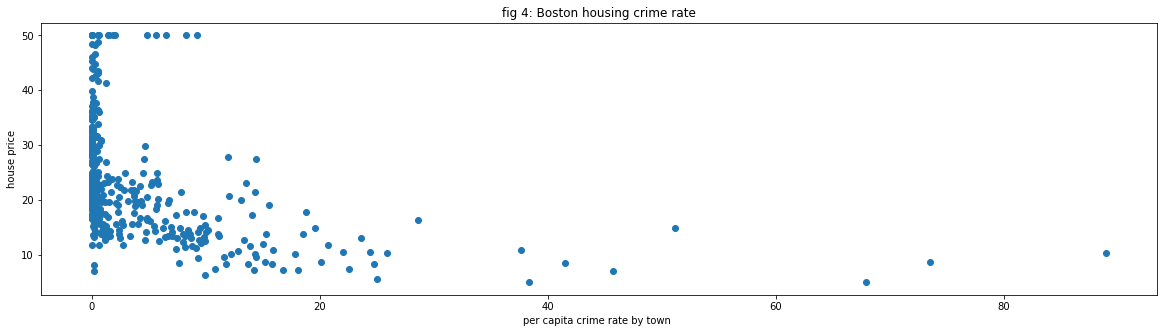

In [22]:
plt.scatter(X[:,0],y)
plt.ylabel('house price')
plt.xlabel('per capita crime rate by town ')
plt.title('fig 4: Boston housing crime rate')

# Description of Testing procedures

The testing procedure in general contains three steps:

- assembling and training the ensemble. This step generally accounts for the diversity that is the reason for the predictive uncertainty generation.

- Making a prediction on a hold out dataset to avoid beginner's mistakes. In this step we actually compute the predictive uncertainty additionally to the classical predicitve mean.

- Obtaining statistics and performance measures for the prediction. In this step, we evaluate the quality of the predictive uncertainty.

## assembling and training the ensemles the ensembles

As mentioned above, this is the crucial step in generating reliable, high quality uncertainty. Ensembles that contain members that are too similar will carry an inherent bias towards their outcomes. While it may be deliberately used to boost performance in certain situations (for example when we know that there is a certain class of models that predicts most of the cases very well but only fails for one particular scenario for which we want to introduce another type of model), in our and in order to obtain 'unbiased' predictive uncertainty, we aim to introduce diversity among the models; 'diversity' in this case refers to a difference in models that were chose with one method. The diversity of models obtained via subsampling the original dataset and using one type of model will always be different and likely lower than one that stems from using entirel different types of models.


- Bootstrapping n datasets from the original training set. As explained above, this is done by drawing from the original data with replacement and results in n models that are trained on similar but different datasets on which different models of the same type cam be trained to obtain different predictions (essentially with emphasis on different parts of the dataset)

- subspace sapling. As explained above, this technique randomly ignores dimensions from the dataset for each of the n predictors. Similarly to bootstrap, this results in ensemble members that are trained on slightly different information and thus give different predictions **THIS IS VERY SIMILAR TO DROPOUT!!!!!!!** Obviusly, this technique can only be used in Datasets that have dim(X) > 1, otherwise there are not enough dimensions to drop it out.

- Random Shuffling of Data. As explained above, certain methods are very [anfaellig] to the [reihenfolge] in which the datapoints are presented. Again, one of the most prominent ones are Neural Networks. However, we tried it with different kinds of other models.

- Mix of Models. As explained above, it is possible to form an ensemble from completely different kinds of models. In our case, due to the scope of this project, we focussed on [this and that and those], however, theoretically there is no limit in what models can be used. Interestingly, even the same model type with different specifications (deep vs shallow neural nets, Forests of different depths, etc) can be used in this form, which can be seen as the [parent, uebergeordnet, super()] of all the other models which are special cases of this one.


## Making a prediction on a hold out dataset

This step is a rather trivial expansion of the classical mean averaging that happens e.g. in scikit learn's random forests:
While the predicitive mean is obtained classically, by computing $$ \mu_i = \sum_{i=1}^N \hat{y_i} $$ where N is the number of ensemble members, $\mu_i$ is the predictive mean for a data point and $\hat{y_i}$ is the prediction of the ith ensemble member. We add the computation $$ \sigma_i = \sqrt{\frac{\sum_{i=1}^N (\hat{y_i} - y_i)^2}{N-1}} $$ which gives us an estimation of variance that the ensemble members find plausible for the given datapoint. With some mathematical leniency, this can be interpreted as predictive mean and variance (see e.g. Gal, Y., & Ghahramani, Z. (2015) or Parker, W. S. (2013)). It is not 100% clear if this value actually corresponds to what we would call 'standard deviation'.

All these operations have been carried out on specified testing datasets in order to avoid false accuracy that leads to a reduction in generalisation of the models. While this is a basic thing to do in any data science situation, it is not strictly necessary for the point being made in this paper.



## Statistics and performance measures

### Root Mean Square Error
Few works looking to evaluate methods used for regression can afford to ommit this measure. It is the classical way of determining if a regression model performs well. Other measures obviously exist, but this one is the most impressive one, partially even known to econometrists.
It is computed by taking the root of the average of the square of errors. Suprise. Like so:
$$ RMSE = \sqrt{\sum_{i=1}^N (\hat{y_i} - y_i)^2}/D $$ Where $\hat{y_i}$ is the prediction , $y_i$ the real target value and D is the number of samples in the Dataset.



### Coverage Probability
Coverage Probability is the probability that a certainty intervall covers a real value. In our case we compute it by counting the number of times a true value falls within the ensembles predictive uncertainty intervall (which we shall call the standard deviation, because it is computed like such. However, as mentioned above, it is not clear if this value corresponds to the description) and then dividing by the total numer of datapoints. 
$$Cov = \frac{\sum_i^N \hat{y}_i}{\sum_i^N y_i}$$, where $\hat{y}_i$ denotes a target value that lies within the uncertainty and y denotes all the target values.




### NLPD
One of the more interesting scores we used is the 'average Negative Log Predictive Density', or NLPD for short. It is used in 
Quiñonero-Candela, J., Rasmussen, C. E., Sinz, F., Bousquet, O., & Schölkopf, B. (n.d.) to assess the quality of uncertainty of different models. 
In a gist, it's an average measure of how closely the predictive uncertainty matches the error, with a logarithmic penalty term for uncertainties.
$$ NLPD_i = log(\sigma_i) + \frac{(\hat{y_i}- y_i)^2}{\sigma_i} $$ where $\sigma_i$ is a samples predictive uncertainty, $\hat{y_i}$ is the samples predictive mean and $y-i$ is the samples real target value. 

Fig 1 displays the NLPD depending on $\sigma$ with a fixed value for $(\hat{y_i}- y_i)^2 = 1$. As we can see, it penalizes overconfident models (that display low uncertainty although they exhibit high error) more than underconfident (vice versa) ones. This opinion has its benefits and negative sides, but in general, it is an interesting measure of the quality of uncertainty.



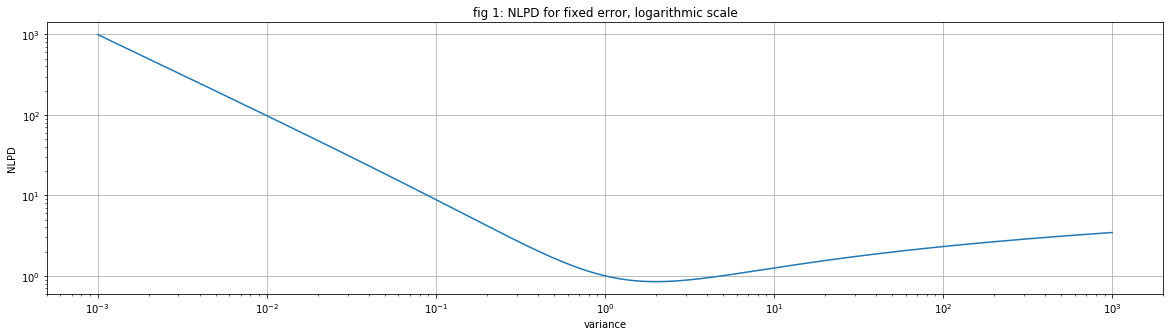

In [12]:
v = np.arange(0.001,1000,.001)
e = np.arange(0,100,1000)
def nlpd_v(v):
    return 1/2 * np.log(v) + ((1)/v)
val_nlpd_v = nlpd_v(v)
plt.loglog(v,val_nlpd_v)
plt.xlabel('sigma')
plt.ylabel('NLPD')
plt.title('fig 1: NLPD for fixed error, logarithmic scale')
plt.grid(True)

In [ ]:

Each of the experiments has been performed 100 times with different starting conditions (np.random.seed) in order to test the validity of each outcome.




Focus on regression due to personal interest.
**little work on uncertainty in regression tasks altough they seem very important to the author**

5 ways of generating uncertainty
**generating uncertainty from a pre trained ensemble is trivial, as we have seen in the previous paragraph. However, during training time we have to ensure a group of models that is sufficiently different from each other to obtain different values of prediction that we can then use to compute the standard deviation (hving the same value we would not be able to compute this). Several kinds of predictors are very [anfaellig] for different initial conditions, most prominently Neural Networks. However, there are other ways of making sure our experts are sufficiently specialised:**


ways of quantifying uncertainty
**cross validation for every value, out of sample prediction (extreme values that are not reflected in the training data), coverage probability, calibration, correlation between uncertainty and error**

other measures
**rsme, normalcy of error distribution to see if the models generally use all the information**

Boston: 506 houses, 13 dimensions, target value is the price of the house.
it is drawn from https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names, but since it comes handily with sklearn.load_boston(), this project uses that version.

Description: https://www.kaggle.com/vikrishnan/boston-house-prices

Statistical [Auswertung]: 
**each of the experiments has been performed 100 times, we report the outcomes of each of them. If not otherwise specified, in cases where the variation was sufficiently low, we only look at the mean of the statistic**




# Results. 
Ensure to perform a correct experimental analysis (e.g. repeated experiments,
statistical analysis of results)


Report on: Generally this is a very good way of obtaining uncertainty estimates

Then go for the singular ones, but mention that obviously there is an infinite possibility to combine all of the models, so this is only a point estimate (bwahahaha)



#  Conclusion. 
Is your line of work worth pursuing? What additional enhancements could be made?


- YES! generally amazing

- In more detail have to look that the techniques and whihc one is fitting for the task at hand

- Watch out for more of this

- Deep Learning can be used in this!

- Make sure to have uncorrelated models, otherwise you're deceiving yourself

- Theoretically can combine different kinds of models and can thus be used for other things (deep learning and linear combined results in A little Explainability)


# A short description of the contribution and self-evaluation of each member of the team

Thomas Rost: 

Idea: 100%

[Ausfuehrung]: 100%

sanity check: 95% (other 5% attributed to voices in his head, one of which always hums one of bachs concertos rewritten for an ensemble of 4 pianos)

Generally happy with the result. I had a lot of fun doing this, however, because I had to do it next to a full time job while also not neglecting my family and friends, I believe with an extra week I could have done a bit more (test more kinds of ensembles, do the leap to deep learning properly, test more datasets, find more suiting mearuement variables and most of all, get this all in a bit of a nicer form). Overall, it was a nice experience, and since I do not depend on the grade that much (since I had to also do the assignments alone, which is a bit much for one), I am ok with what I put up here. I am very much looking forward to some feedback and ideas, I think this will be (at least part of) what I will focus on during further studies.


# Link to Github

The Code, examples and further analysis can be found at https://github.com/wooohoooo/natcompproj/

# Notes

A 15 to  max 20 pages document. The report should include:

• Specific goals of the work.

• Review of related work.

• Description of your testing procedures.

• Description of the algorithms used. Ensure that the work is reproducible given your
description.

• Results. Ensure to perform a correct experimental analysis (e.g. repeated experiments,
statistical analysis of results).

• Conclusion. Is your line of work worth pursuing? What additional enhancements could be made?

• A short description of the contribution and self-evaluation of each member of the team

• URL address where we can find implementation of algorithms developed and used during the project: 1) source code, together with all data necessary to run the program and a short manual describing how to use/run the program, and 2) a sample run, screenshot, or other indication of system behaviour.

Deadline: 20 June.

# NOtes 2




- use the teachings on Ensembles (a number of experts who's opinion is combined to increase the probability of it being correct) to estimate the uncertainty within which the predicted value is going to fall

- Die Berechnung der Likelihood of combination of experts being correct vs how it scales with group size

- Why Uncertainty? Agents! See Academic Writing sample



The difference between statistical modelling and machine learning is generally not well defined. Both gain insights form large amounts of data and both utilise complex models in order to make their predictions. 

One of the possible differences is that Statistical Modelling generally depends on the existence of fully specified distributions, while Machine Learning in general is more concerned with point-estimation of target values. 
However, a few approaches seem to be able to combine the benefits of both approaches. These approaches, generally spearheaded by bayesian scientists (who are uncomfortable with point estimations in general, as they always want to know a full distribution over predictions).


- Uncertainty is important for decision making

- See eg. the online bootstrap for explanation why, or Agrawal, S., Com, S., Goyal, N., Mannor, S., Srebro, N., & Williamson, R. C. (2012). Analysis of Thompson Sampling for the Multi-armed Bandit Problem, 2326(39), 1–39. Retrieved from http://proceedings.mlr.press/v23/agrawal12/agrawal12.pdf

- difference between statistical modelling and machine learning ~ uncertainty

- Two approaches:

- Bayesian Approaches to Uncertainty: Fully specified distribution - although most of the time it's approximated because fully bayesian methods are expensive; so what we usually have is either variational bayes or MCMC

- Frequentist Approach to uncertainty:  ‘confidence interval’ (see https://www.bipm.org/cc/CCT/Allowed/26/Disentangling_uncertainty_v14.pdf)

- Ensemble is a method where the prediction of many different models are combined to produce a more elaborate prediction (Find a standard text on ensembles - in the course?)

- Ensembles are very much like asking different experts their opinion in order to find a more likely true prediction (look at the berechnung in one of the assignments)

- Thus theoretically, we can assume that no single expert holds the truth, but we can assume that since different experts have different opinions that are all somewhat grounded in truth, the real model BZW THE BEST POSSIBLE MODEL GIVEN THE DATA AND FORMALISMS we have in place is somewhere betweeen the opinions. Thus we take the predictive mean - the mean of all the predictions - and use that as our final prediction. However, it is possible to extract uncertainty information from this group of experts: If they are all kind of recommending the same thing, it is likely that the optimal recommendation is somewhere close to the value. If all eperts vastly disagree, we can assume that there is not enough information in the Data they have seen, or that the structure of their studies isn't enough, or that there is something wrong otherwise. It is likely that each of them is either basing their decision on wrong data or that they are just randomly guessing (and pretending to know VERY well what they are talking about, as is some experts style).

- This is reflected when we don't only take the mean of the prediction of our Ensemble but also it's standard deviation.

- Thus we can easily infer the uncertainty of our model with almost no extra computaional cost.

- Important: the models need to be sufficiently different in order for this to be a valid method. ASking an expert, his best friend and ten of their studendts might falsely lead to a very confident clique of experts.

- to test for this, use predictive power of one member on the others divided by the predictive power of one ensemble member on the error of the ensemble?



# THIS IS approximately one page

[such as: WHAT DOES THIS MEAN? this is a distribution over how likely the model thinks the values are, obviously this changes a lot when we change the model (see e.g. the mixed model ensemble with and without linear component!), how do we utilise the information to e.g. choose ensemble members (adding and removing members from this prediction is easy - just do or do not use their prediction in the final outcome). This could be determined e.g. by seeing if both the error of the ensemble goes down by removing the member, but also by looking at the quality of uncertainty before and after - removing a member that contributes to error but also makes sure the predictive uncertainty is more finely attuned to the case might indicate that it DOES indeed have some information that is useful in many contexts).]





# Bibliography

Kuncheva, L. I. (2004). Combining Pattern Classifers. Methods and Algorithms.
Wiley, Chichester. Chapter 4 & 5.


Dietterich, T. G. (n.d.). Ensemble Methods in Machine Learning. Retrieved from http://www.cs.orst.edu/~tgd

Ho, T. K. (1998). The random subspace method for constructing decision
forests. IEEE transactions on pattern analysis and machine intelligence,
20(8), 832-844.

Lakshminarayanan, B., Pritzel, A., & Blundell, C. (n.d.). Simple and Scalable Predictive Uncertainty Estimation using Deep Ensembles. Retrieved from https://arxiv.org/pdf/1612.01474.pdf


Renard, B., Kavetski, D., Kuczera, G., Thyer, M., & Franks, S. W. (2010). Understanding predictive uncertainty in hydrologic modeling: The challenge of identifying input and structural errors. Water Resour. Res, 46. http://doi.org/10.1029/2009WR008328


Kiureghian, A. Der, & Ditlevsen, O. (2009). Aleatory or epistemic? Does it matter? Structural Safety, 31(2), 105–112. http://doi.org/10.1016/J.STRUSAFE.2008.06.020



Quiñonero-Candela, J., Rasmussen, C. E., Sinz, F., Bousquet, O., & Schölkopf, B. (n.d.). Evaluating Predictive Uncertainty Challenge. Retrieved from https://pdfs.semanticscholar.org/2e5a/fed6eb2ef1e360618b7b1d545b7616d750b8.pdf


Gal, Y., & Ghahramani, Z. (2015). Dropout as a Bayesian Approximation: Representing Model Uncertainty in Deep Learning. Retrieved from http://arxiv.org/abs/1506.02142


Characterizing and Visualizing Predictive Uncertainty in Numerical Ensembles Through Bayesian Model Averaging. (n.d.). Retrieved from http://graphics.cs.ucdavis.edu/~joy/NSF-IIS-1018097/Papers/Vis13_175.pdf


Parker, W. S. (2013). Ensemble modeling, uncertainty and robust predictions. Wiley Interdisciplinary Reviews: Climate Change, 4(3), 213–223. http://doi.org/10.1002/wcc.220


Quiñonero-Candela, J., Rasmussen, C. E., Sinz, F., Bousquet, O., & Schölkopf, B. (n.d.). Evaluating Predictive Uncertainty Challenge. Retrieved from https://pdfs.semanticscholar.org/2e5a/fed6eb2ef1e360618b7b1d545b7616d750b8.pdf